# Load Data

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(os.listdir("0.data/3rd-ml100marathon-midterm/"))

['enron61702insiderpay.pdf', 'sample_submission.csv', 'test_features.csv', 'train_data.csv']


In [2]:
df_train = pd.read_csv('0.data/3rd-ml100marathon-midterm/train_data.csv')
df_test = pd.read_csv('0.data/3rd-ml100marathon-midterm/test_features.csv')
id = df_test['name']
print('train shape:', df_train.shape)
print('test shape:', df_test.shape)

train shape: (113, 22)
test shape: (33, 21)


# EDA

In [18]:
df_train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
name                         113 non-null object
bonus                        61 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                83 non-null object
exercised_stock_options      81 non-null float64
expenses                     73 non-null float64
from_messages                65 non-null float64
from_poi_to_this_person      65 non-null float64
from_this_person_to_poi      65 non-null float64
loan_advances                2 non-null float64
long_term_incentive          49 non-null float64
other                        69 non-null float64
poi                          113 non-null bool
restricted_stock             82 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       73 non-null float64
shared_receipt_wi

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 21 columns):
name                         33 non-null object
bonus                        21 non-null float64
deferral_payments            11 non-null float64
deferred_income              15 non-null float64
director_fees                4 non-null float64
email_address                28 non-null object
exercised_stock_options      21 non-null float64
expenses                     22 non-null float64
from_messages                21 non-null float64
from_poi_to_this_person      21 non-null float64
from_this_person_to_poi      21 non-null float64
loan_advances                2 non-null float64
long_term_incentive          17 non-null float64
other                        24 non-null float64
restricted_stock             28 non-null float64
restricted_stock_deferred    8 non-null float64
salary                       22 non-null float64
shared_receipt_with_poi      21 non-null float64
to_messages         

In [31]:
df_train.dtypes.value_counts()

float64    19
object      2
bool        1
dtype: int64

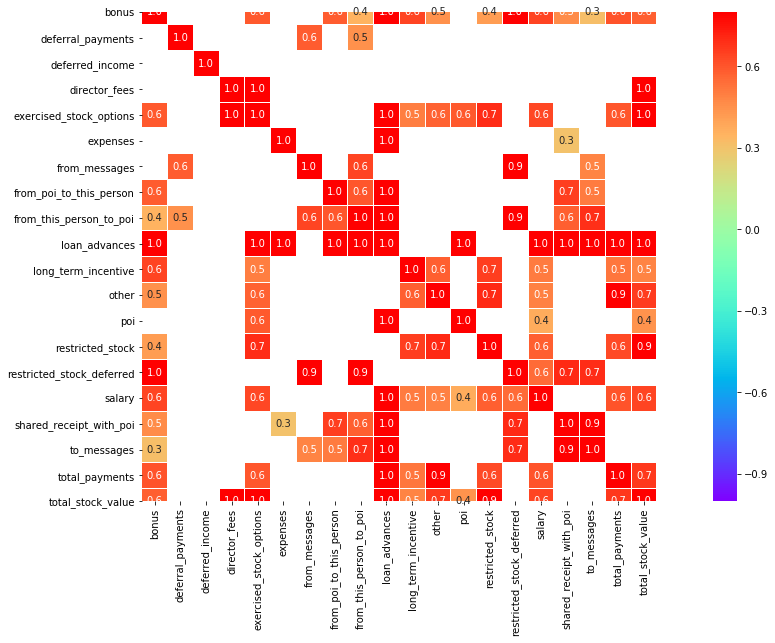

In [30]:
corr = df_train.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corr, vmax =0.8, square=True, linewidths=0.05, cmap='rainbow', mask = corr < 0.3, annot=True, fmt='.1f')
plt.show()

In [45]:
k = 6
cols = corr.nlargest(k, 'poi').index
print(cols)

Index(['loan_advances', 'poi', 'exercised_stock_options', 'total_stock_value',
       'salary', 'total_payments'],
      dtype='object')


In [48]:
df_train.loan_advances.value_counts()

81525000.0    1
400000.0      1
Name: loan_advances, dtype: int64

In [131]:
df_train.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,5.600000e+01,1.700000e+01,2.400000e+01,1.0,6.400000e+01,57.000000,56.000000,56.000000,56.000000,0.0,4.400000e+01,6.100000e+01,8.100000e+01,9.000000,6.400000e+01,56.000000,56.000000,6.900000e+01,8.100000e+01
mean,1.102408e+06,7.783555e+05,-6.190842e+05,108750.0,2.602773e+06,51770.596491,817.392857,71.946429,45.875000,NaN,6.608865e+05,2.726141e+05,1.128598e+06,-251438.888889,2.660549e+05,1206.678571,2336.428571,1.824704e+06,3.157172e+06
std,1.338009e+06,8.489520e+05,9.222139e+05,NaN,4.044925e+06,44409.929996,2219.082363,96.048931,94.570236,NaN,5.914695e+05,5.129647e+05,2.006182e+06,193754.455597,1.371347e+05,1195.104120,2949.069140,1.756582e+06,5.053621e+06
min,2.000000e+05,7.961000e+03,-3.504386e+06,108750.0,9.803000e+03,475.000000,12.000000,0.000000,0.000000,NaN,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,10.000000,102.000000,4.750000e+02,8.564100e+04
25%,5.000000e+05,7.771600e+04,-7.008965e+05,108750.0,5.701288e+05,22344.000000,28.750000,11.750000,1.750000,NaN,2.750000e+05,1.191000e+03,2.640130e+05,-409554.000000,2.115560e+05,283.250000,557.750000,9.114530e+05,5.974610e+05
50%,7.500000e+05,6.495840e+05,-2.712500e+05,108750.0,1.176684e+06,43057.000000,54.000000,36.000000,9.500000,NaN,3.987310e+05,5.238200e+04,4.623840e+05,-153686.000000,2.545700e+05,721.500000,1211.000000,1.410464e+06,1.038185e+06
75%,1.025000e+06,1.130036e+06,-3.927075e+04,108750.0,2.702422e+06,59175.000000,221.250000,92.500000,40.500000,NaN,8.142118e+05,3.010260e+05,9.567750e+05,-94556.000000,2.885460e+05,2078.500000,2842.000000,2.101364e+06,3.101279e+06
max,8.000000e+06,2.869717e+06,-1.042000e+03,108750.0,1.979418e+07,228763.000000,14368.000000,528.000000,411.000000,NaN,2.234774e+06,2.660303e+06,1.384707e+07,-44093.000000,1.111258e+06,4527.000000,15149.000000,1.042576e+07,2.609367e+07


In [130]:
df_train['total_payments'].max()

10425757.0

# Pre-process

In [3]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

 ### 移除離群值

In [4]:
df_train = df_train[df_train['total_stock_value'] != 49110078]

In [5]:
# 移除價格金額 < 0 的資料
df_train = df_train[df_train['total_stock_value'] > 0]
df_train = df_train[df_train['restricted_stock'] > 0]

In [6]:
train_Y = df_train['poi']

In [7]:
def na_check(df_data):
    total = df_data.isnull().sum().sort_values(ascending=False)
    df_na = (df_data.isnull().sum() / len(df_data)) * 100
    df_na = df_na.sort_values(ascending=False)
    print(pd.concat([total, df_na], axis=1, keys=['Total', 'Missing Ratio']))
    
na_check(df_train)

                           Total  Missing Ratio
loan_advances                 81     100.000000
director_fees                 80      98.765432
restricted_stock_deferred     72      88.888889
deferral_payments             64      79.012346
deferred_income               57      70.370370
long_term_incentive           37      45.679012
bonus                         25      30.864198
shared_receipt_with_poi       25      30.864198
to_messages                   25      30.864198
from_poi_to_this_person       25      30.864198
from_messages                 25      30.864198
from_this_person_to_poi       25      30.864198
expenses                      24      29.629630
other                         20      24.691358
salary                        17      20.987654
exercised_stock_options       17      20.987654
total_payments                12      14.814815
email_address                  9      11.111111
total_stock_value              0       0.000000
poi                            0       0

In [8]:
df_train2 = df_train.drop(['name','poi'], axis=1)
df_test2 = df_test.drop(['name'], axis=1)
df = pd.concat([df_train2, df_test2])
df.shape

(114, 20)

In [9]:
df_cols = ['salary','expenses','exercised_stock_options','restricted_stock'
                         ,'total_payments','total_stock_value']
df_train_flt = df[df_cols]
df_train_flt

,salary,expenses,exercised_stock_options,restricted_stock,total_payments,total_stock_value
0,420636.0,46950.0,19794175.0,2748364.0,505050.0,22542539.0
1,1111258.0,29336.0,19250000.0,6843672.0,8682716.0,26093672.0
2,211844.0,22884.0,1624396.0,869220.0,2003885.0,2493616.0
3,224305.0,118134.0,NaN,985032.0,2652612.0,985032.0
4,240189.0,35818.0,NaN,126027.0,1639297.0,126027.0
...,...,...,...,...,...,...
28,213625.0,38559.0,1465734.0,378082.0,2047593.0,1843816.0
29,428780.0,NaN,1835558.0,1293424.0,4335388.0,3128982.0
30,NaN,NaN,2218275.0,NaN,966522.0,2218275.0
31,236457.0,57727.0,2549361.0,514847.0,875889.0,3064208.0


In [120]:
df_train_flt.describe()

,salary,expenses,exercised_stock_options,restricted_stock,total_payments,total_stock_value
count,8.700000e+01,8.000000e+01,8.600000e+01,1.100000e+02,9.900000e+01,1.100000e+02
mean,5.921081e+05,1.206755e+05,6.625742e+06,2.321741e+06,6.221428e+06,7.388185e+06
std,2.837427e+06,5.806583e+05,3.367121e+07,1.251828e+07,3.258226e+07,4.158877e+07
min,4.770000e+02,4.750000e+02,9.803000e+03,-2.604490e+06,4.750000e+02,4.730400e+04
25%,2.138120e+05,2.530625e+04,6.549812e+05,2.540180e+05,8.100750e+05,6.614698e+05
50%,2.615160e+05,4.838100e+04,1.446884e+06,4.517400e+05,1.321557e+06,1.292445e+06
75%,3.121170e+05,8.191925e+04,3.257532e+06,1.002370e+06,2.396117e+06,3.365598e+06
max,2.670423e+07,5.235198e+06,3.117640e+08,1.303223e+08,3.098866e+08,4.345095e+08


In [10]:
# 缺值補 平均值
for c in df_cols:
    if df_train_flt[c].dtypes == 'float64':
        df_train_flt[c] = df_train_flt[c].fillna(df_train_flt[c].mean())

In [122]:
# 缺值補 None
df_train_flt['email_address'] = df_train_flt['email_address'].fillna('None')

KeyError: 'email_address'

In [11]:
# 做完各種補缺值, 確認一下有沒有遺漏
na_check(df_train_flt)

                         Total  Missing Ratio
total_stock_value            0            0.0
total_payments               0            0.0
restricted_stock             0            0.0
exercised_stock_options      0            0.0
expenses                     0            0.0
salary                       0            0.0


In [32]:
# one-hot encoder
df_train_flt = pd.get_dummies(df_train_flt)

In [12]:
# 將前述轉換完畢資料 df_train_flt , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df_train_flt[:train_num]
test_X = df_train_flt[train_num:]
train_X.shape, test_X.shape

((81, 6), (33, 6))

# Model

In [13]:
from sklearn import metrics, datasets, linear_model
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [71]:
# knn
k_range = range(1,11)
k_scores = []
train_accuracy = []
val_accuracy = []
bestKnn = None
bestAcc = 0.0
X_train = train_X
y_train = train_Y
for k_number in k_range:
    # define model
    knn = KNeighborsClassifier(n_neighbors=k_number, n_jobs=-1)
    
    # train model
    knn.fit(X_train, y_train)
    
    # train data accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    
    # cross validation accuracy
    tempAccuracy = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean()
    val_accuracy.append(tempAccuracy)
    if tempAccuracy > bestAcc:
        bestAcc = tempAccuracy
        bestKnn = knn

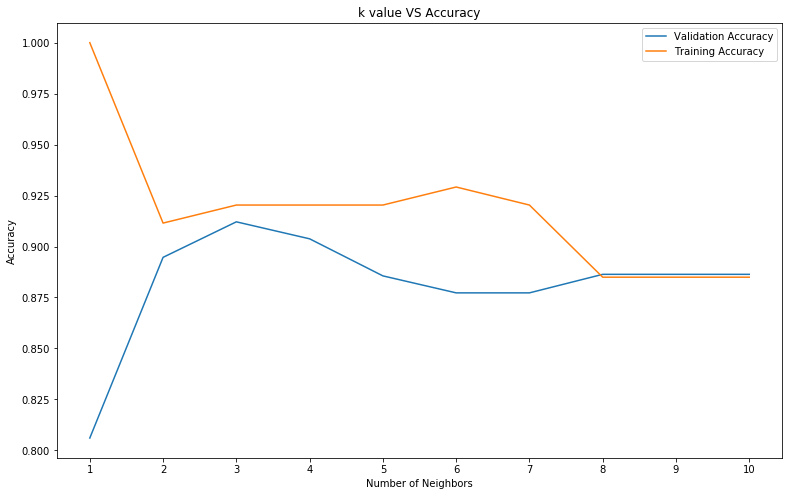

Best Accuracy without feature scaling: 0.9121212121212121
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')


In [72]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, val_accuracy, label = 'Validation Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()

print('Best Accuracy without feature scaling:', bestAcc)
print(bestKnn)

In [73]:
#USING GRID SEARCH
n_neighbors=[3,5,6,7,8,9,10]
param_grid = dict(n_neighbors=n_neighbors)

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy').fit(train_X,train_Y)
knn_best = grid_search_knn.best_estimator_
print('KNN Best Score', grid_search_knn.best_score_)
print('KNN Best Params',grid_search_knn.best_params_)
print('KNN Accuracy',cross_val_score(knn_best,train_X, train_Y, cv=10).mean())

KNN Best Score 0.911504424778761
KNN Best Params {'n_neighbors': 3}
KNN Accuracy 0.9121212121212121


C:\Users\Me\.julia\conda\3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:

knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(train_X,train_Y)
print(cross_val_score(knn_best, train_X, train_Y, cv=10).mean())
knn_pred = knn_best.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name':id,'poi':knn_pred})
# sub['poi'] = sub['poi'].map(lambda x:1 if x> 0.5 else 0)
sub.to_csv('Enron_knn.csv', index=False)

0.8416666666666666


In [15]:
#random forest

rfc = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=50)
print(cross_val_score(rfc, train_X, train_Y, cv=10).mean())

# save to csv
rfc.fit(train_X, train_Y)
rfc_pred = rfc.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name':id,'poi':rfc_pred})
# sub['poi'] = sub['poi'].map(lambda x:1 if x> 0.5 else 0)
sub.to_csv('Enron_rfc.csv', index=False)

0.8527777777777779


In [74]:
#USING GRID SEARCH
n_estimators = [10, 50, 100, 200,400]
max_depth = [3, 10, 20, 40]
param_grid = dict(n_estimators=n_estimators,max_depth=max_depth)

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 10,scoring='accuracy',n_jobs=-1).fit(train_X, train_Y)
rfc_best = grid_search_rfc.best_estimator_
print('Random Forest Best Score',grid_search_rfc.best_score_)
print('Random Forest Best Parmas',grid_search_rfc.best_params_)
print('Random Forest Accuracy',cross_val_score(rfc_best,train_X, train_Y, cv=10).mean())

C:\Users\Me\.julia\conda\3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Random Forest Best Score 0.8849557522123894
Random Forest Best Parmas {'max_depth': 3, 'n_estimators': 50}
Random Forest Accuracy 0.8863636363636364


In [16]:
# GradientBoostingClassifier

# gdbt = GradientBoostingClassifier(subsample=0.93, n_estimators=320, min_samples_split=0.1,
#                                  min_samples_leaf=0.3, max_features=4, max_depth=4, learning_rate=0.16) # 調整參數
# gdbt = GradientBoostingClassifier(subsample=0.6, n_estimators=400, max_depth=4, learning_rate=0.05) # 調整參數
gdbt = GradientBoostingClassifier(subsample=0.6, n_estimators=50, max_depth=3, learning_rate=0.05) # 調整參數
# gdbt.fit(train_X, train_Y) # 訓練 GDBT

# y_pred = gdbt.predict(test_X)

print(cross_val_score(gdbt, train_X, train_Y, cv=10).mean())

# save to csv
gdbt.fit(train_X, train_Y)
gdbt_pred = gdbt.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name':id,'poi':gdbt_pred})
# sub['poi'] = sub['poi'].map(lambda x:1 if x> 0.5 else 0)
sub.to_csv('Enron_gdbt.csv', index=False)

0.8277777777777778


In [32]:
#USING GRID SEARCH
gdbt = GradientBoostingClassifier()
subsample =  [0.5, 0.6, 0.8, 0.9, 0.93, 0.95]
n_estimators = [10, 50, 100, 200, 320, 400]
max_depth = [3, 4, 10, 20, 40]
lr = [0.01, 0.05, 0.1, 0.15, 0.16, 0.2]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate = lr, subsample = subsample)

grid_search_gdbt = GridSearchCV(estimator=gdbt, param_grid=param_grid, cv = 10,scoring='accuracy',n_jobs=-1).fit(train_X, train_Y)
gdbt_best = grid_search_gdbt.best_estimator_
print('GDBT Best Score',grid_search_gdbt.best_score_)
print('GDBT Best Parmas',grid_search_gdbt.best_params_)
print('GDBT Accuracy',cross_val_score(gdbt_best,train_X, train_Y, cv=10).mean())

C:\Users\Me\.julia\conda\3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GDBT Best Score 0.9026548672566371
GDBT Best Parmas {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
GDBT Accuracy 0.8946969696969695


In [99]:
# SVM
from sklearn.svm import SVC
svc = SVC()
cross_val_score(svc, train_X, train_Y, cv=10).mean()

0.8863636363636364

In [ ]:
# SVM
svc = SVC()

#USING GRID SEARCH
parameters = [{'kernel':['linear'],'C':[1,10,100]},
              {'kernel':['rbf'],'C':[1,10,100],'gamma':[0.05,0.0001,0.01,0.001]}]
grid_search_svm = GridSearchCV(estimator=svc, param_grid=parameters, cv = 10, n_jobs=-1,scoring='accuracy').fit(train_X, train_Y)
svm_best = grid_search_svm.best_estimator_
print('SVM Best Score',grid_search_svm.best_score_)
print('SVM Best Params',grid_search_svm.best_params_)
print('SVM Accuracy',cross_val_score(svm_best,gmm_train, train_labels.values.ravel(), cv=10).mean())

In [17]:
# 使用三種模型 : 線性迴歸 / 梯度提升機 / 隨機森林, 參數使用 Random Search 尋找
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
linear = LinearRegression(normalize=False, fit_intercept=True, copy_X=True)
gdbt = GradientBoostingRegressor(tol=0.1, subsample=0.37, n_estimators=200, max_features=20, 
                                 max_depth=6, learning_rate=0.03)
rf = RandomForestRegressor(n_estimators=300, min_samples_split=9, min_samples_leaf=10, 
                           max_features='sqrt', max_depth=8, bootstrap=False)

In [39]:
print(cross_val_score(linear, train_X, train_Y, cv=10).mean())

linear.fit(train_X, train_Y)
linear_pred = linear.predict(test_X)
sub = pd.DataFrame({'name':id,'poi':linear_pred})
sub.to_csv('Enron_linear.csv', index=False)

0.0006836359995221808


In [40]:
# 隨機森林預測檔 
print(cross_val_score(rf, train_X, train_Y, cv=10).mean())
rf.fit(train_X, train_Y)
rf_pred = rf.predict(test_X)
sub = pd.DataFrame({'name':id,'poi':rf_pred})
sub.to_csv('Enron_rfr.csv', index=False)

0.002603412361405688


# Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler,Normalizer, StandardScaler

In [18]:
X_std = StandardScaler().fit_transform(train_X)
X_norm = Normalizer().fit_transform(train_X)
X_mms = MinMaxScaler().fit_transform(train_X)

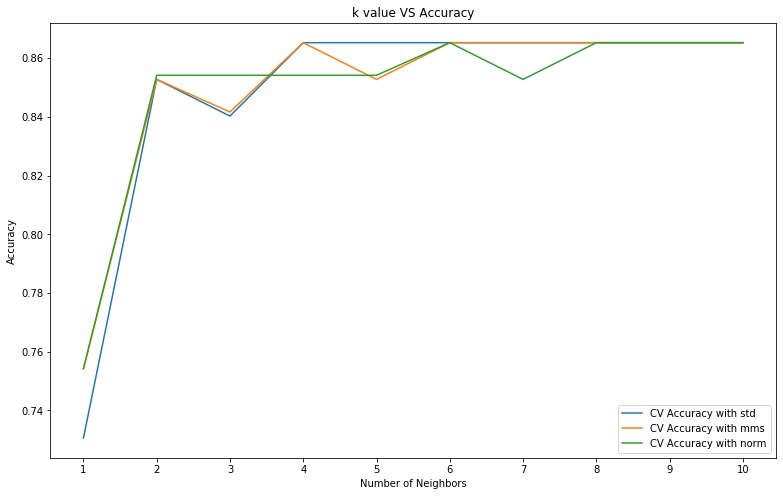

Best Accuracy with feature scaling: 0.8652777777777778
Best kNN classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
Best scaling: std


In [19]:
neig = np.arange(1,11)
kfoldl = 10
val_accuracy = {'std':[], 'mms':[],'norm':[]}
bestKnn = None
bestAcc = 0.0
bsetScaling = None
y = train_Y
for k in neig:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    s1 = cross_val_score(knn, X_std, y, cv = kfoldl).mean()
    val_accuracy['std'].append(s1)
    s2 = cross_val_score(knn, X_mms, y, cv = kfoldl).mean()
    val_accuracy['mms'].append(s2)
    s3 = cross_val_score(knn, X_norm, y, cv = kfoldl).mean()
    val_accuracy['norm'].append(s3)
    if s1 > bestAcc:
        bestAcc = s1
        bestKnn = knn
        bestScaling = 'std'
    elif s2 > bestAcc:
        bestAcc = s2
        bestKnn = knn
        bestScaling = 'mms'
    elif s3 > bestAcc:
        bestAcc = s3
        bestKnn = knn
        bestScaling = 'norm'
# Plot
plt.figure(figsize=[13,8])
# plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.plot(neig, val_accuracy['std'], label = 'CV Accuracy with std')
plt.plot(neig, val_accuracy['mms'], label = 'CV Accuracy with mms')
plt.plot(neig, val_accuracy['norm'], label = 'CV Accuracy with norm')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

print('Best Accuracy with feature scaling:', bestAcc)
print('Best kNN classifier:', bestKnn)
print('Best scaling:', bestScaling) 


In [79]:
np.mean(val_accuracy['std']), np.mean(val_accuracy['mms']), np.mean(val_accuracy['norm']), np.mean(train_accuracy)

(0.8743181818181819, 0.8744696969696969, 0.8793181818181818, 0.917699115044248)

In [20]:
#random forest

rfc = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=50)
print(cross_val_score(rfc, X_mms, train_Y, cv=10).mean())

# save to csv
rfc.fit(X_mms, train_Y)
rfc_pred = rfc.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name':id,'poi':rfc_pred})
# sub['poi'] = sub['poi'].map(lambda x:1 if x> 0.5 else 0)
sub.to_csv('Enron_rfc_mms.csv', index=False)

0.8527777777777779


In [21]:
#random forest

rfc = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=50)
print(cross_val_score(rfc, X_std, train_Y, cv=10).mean())

# save to csv
rfc.fit(X_std, train_Y)
rfc_pred = rfc.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name':id,'poi':rfc_pred})
# sub['poi'] = sub['poi'].map(lambda x:1 if x> 0.5 else 0)
sub.to_csv('Enron_rfc_std.csv', index=False)

0.8527777777777779


# Ensemble

In [20]:
from mlxtend.regressor import StackingRegressor
meta_estimator = GradientBoostingRegressor(tol=10, subsample=0.44, n_estimators=100, 
                                           max_features='log2', max_depth=4, learning_rate=0.1)
stacking = StackingRegressor(regressors=[linear, rf], meta_regressor=meta_estimator)

In [25]:
stacking.fit(train_X, train_Y)
stacking_pred = stacking.predict(test_X)
sub = pd.DataFrame({'name':id,'poi':stacking_pred})
sub.to_csv('Enron_stacking.csv', index=False)

In [105]:
blending_pred = linear_pred*0.85 + rf_pred*0.15
sub = pd.DataFrame({'name':id,'poi':np.expm1(stacking_pred)})
sub.to_csv('Enron_blending.csv', index=False)

In [23]:
cross_val_score(linear, train_X, train_Y, cv=10).mean()

0.0013782589383015131

In [24]:
cross_val_score(rf, train_X, train_Y, cv=10).mean()

0.005013028397623265

In [61]:
pd.read_csv('Enron_stacking.csv').head()

,name,poi
0,BELDEN TIMOTHY N,-0.001098
1,BOWEN JR RAYMOND M,-0.241281
2,HANNON KEVIN P,-0.007341
3,DELAINEY DAVID W,0.007172
4,CAUSEY RICHARD A,0.972287


In [60]:
pd.read_csv('Enron_blending.csv').head()

,name,poi
0,BELDEN TIMOTHY N,0.021597
1,BOWEN JR RAYMOND M,-0.039751
2,HANNON KEVIN P,0.342513
3,DELAINEY DAVID W,0.389160
4,CAUSEY RICHARD A,1.526852


In [78]:
pd.read_csv('Enron_linear.csv').head()

,name,poi
0,BELDEN TIMOTHY N,0.154762
1,BOWEN JR RAYMOND M,0.154762
2,HANNON KEVIN P,0.154762
3,DELAINEY DAVID W,0.154762
4,CAUSEY RICHARD A,0.154762
